In [4]:
import sys
import os

sys.path.append("/data/igor/loss_traces")

In [5]:
from results.result_processing import get_trace_reduction
from results.utils import (
    make_precision_recall_at_k_df,
    get_precision_at_fpr,
    make_precision_recall_at_k_df_single_threshold,
)
from results.final_model_metrics import get_final_model_metrics
from attacks import AttackConfig, LiRAAttack
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import pickle

In [3]:
def positives_at_fpr(results, target_fpr=0.001):
    fpr, tpr, thresholds = roc_curve(
        results["target_trained_on"], results["lira_score"]
    )

    closest_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[closest_idx]

    positives_at_threshold = np.sum(
        (results["lira_score"] >= threshold) & (results["target_trained_on"])
    )

    return positives_at_threshold

In [10]:
target_id = "target"
attack = "LiRA"
augment = True
batchsize = 32
num_workers = 8
gpu = ":1"
dataset = "CIFAR10"
arch = "wrn28-2"
exp_id = f"{arch}_{dataset}"

config = AttackConfig(
    exp_id=exp_id,
    target_id=target_id,
    checkpoint=None,
    arch=arch,
    dataset=dataset,
    attack=attack,
    augment=augment,
    batchsize=batchsize,
    num_workers=num_workers,
    gpu=gpu,
)
attack = LiRAAttack(config)

In [11]:
results = attack.run()


RESULTS EXIST BUT NOT OVERWRITING


Attack AUC: 0.7406980464


In [12]:
df = get_final_model_metrics(
    model=attack.model, data_loader=attack.attack_loaders[0], metrics=["loss"]
)
df = pd.merge(df, results, left_index=True, right_index=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:09<00:00, 172.65it/s]


In [13]:
df

,loss,confidence,lira_score,target_trained_on
0,2.515284e-05,22.432823,1.575805e+00,True
1,7.152555e-07,28.949844,1.287782e+00,True
2,1.778444e-04,17.596689,9.335236e-01,False
3,4.315283e-05,20.650789,1.645038e+00,True
4,3.184765e-04,17.299870,1.167192e+00,False
...,...,...,...,...
49995,5.646396e+00,1.867180,8.327365e-09,False
49996,2.423868e-02,7.588379,7.044658e-03,False
49997,5.236481e-03,11.244856,7.556936e+00,True
49998,1.103817e-04,19.196409,1.004283e+00,True


In [16]:
attack.config

AttackConfig(exp_id='wrn28-2_CIFAR10', target_id='target', checkpoint=None, arch='wrn28-2', dataset='CIFAR10', attack='LiRA', n_shadows=None, offline=None, augment=True, batchsize=32, num_workers=8, gpu=':1')

In [15]:
make_precision_recall_at_k_df_single_threshold(
    scores_df=df,
    ground_truth_df=results,
    fpr_threshold=0.001,
    k_frac=0.01,
)

{'fpr': 0.00104,
 'tpr': 0.09744,
 'positives': 2436,
 'precision_random_guess': 0.09744,
 'recall_random_guess': 0.01,
 'overlap_loss_desc': 52,
 'precision_loss_desc': 0.208,
 'recall_loss_desc': 0.021346469622331693,
 'overlap_loss_asc': 5,
 'precision_loss_asc': 0.02,
 'recall_loss_asc': 0.002052545155993432,
 'overlap_confidence_desc': 5,
 'precision_confidence_desc': 0.02,
 'recall_confidence_desc': 0.002052545155993432,
 'overlap_confidence_asc': 50,
 'precision_confidence_asc': 0.2,
 'recall_confidence_asc': 0.020525451559934318,
 'overlap_lira_score_desc': 250,
 'precision_lira_score_desc': 1.0,
 'recall_lira_score_desc': 0.10262725779967159,
 'overlap_lira_score_asc': 0,
 'precision_lira_score_asc': 0.0,
 'recall_lira_score_asc': 0.0}

In [ ]:
# df_final_model_metrics.to_csv("final_model_metrics_wrn28_cifar10.csv", index=True)

In [50]:
with open("all_results.pkl", "wb") as f:
    pickle.dump(all_results, f)


In [21]:
make_precision_recall_at_k_df_single_threshold(
    scores_df = df,
    ground_truth_df=results,
    fpr_threshold=0.001,
    k_frac=0.01,
)

NameError: name 'df' is not defined

In [20]:
df_res


{'fpr': 0.00104,
 'tpr': 0.09744,
 'positives': 2436,
 'precision_random_guess': 0.09744,
 'recall_random_guess': 0.01,
 'overlap_loss_desc': 19,
 'precision_loss_desc': 0.076,
 'recall_loss_desc': 0.007799671592775041,
 'overlap_loss_asc': 16,
 'precision_loss_asc': 0.064,
 'recall_loss_asc': 0.006568144499178982,
 'overlap_confidence_desc': 27,
 'precision_confidence_desc': 0.108,
 'recall_confidence_desc': 0.011083743842364532,
 'overlap_confidence_asc': 19,
 'precision_confidence_asc': 0.076,
 'recall_confidence_asc': 0.007799671592775041,
 'overlap_param_grad_norm_desc': 20,
 'precision_param_grad_norm_desc': 0.08,
 'recall_param_grad_norm_desc': 0.008210180623973728,
 'overlap_param_grad_norm_asc': 27,
 'precision_param_grad_norm_asc': 0.108,
 'recall_param_grad_norm_asc': 0.011083743842364532,
 'overlap_param_grad_var_desc': 21,
 'precision_param_grad_var_desc': 0.084,
 'recall_param_grad_var_desc': 0.008620689655172414,
 'overlap_param_grad_var_asc': 27,
 'precision_param_grad_

In [33]:
make_precision_recall_at_k_df_single_threshold(
    scores_df = trace_df,
    ground_truth_df=results,
    fpr_threshold=0.001,
    k_frac=0.01,
)

{'fpr': 0.00104,
 'tpr': 0.09744,
 'positives': 2436,
 'precision_random_guess': 0.09744,
 'recall_random_guess': 0.01,
 'overlap_trace_value_desc': 230,
 'precision_trace_value_desc': 0.92,
 'recall_trace_value_desc': 0.09441707717569786,
 'overlap_trace_value_asc': 0,
 'precision_trace_value_asc': 0.0,
 'recall_trace_value_asc': 0.0}

In [22]:
make_precision_recall_at_k_df_single_threshold(
    scores_df = trace_df,
    ground_truth_df=results,
    fpr_threshold=0.001,
    k_frac=0.01,
)

{'fpr': 0.00104,
 'tpr': 0.09744,
 'positives': 2436,
 'precision_random_guess': 0.09744,
 'recall_random_guess': 0.01,
 'overlap_trace_value_desc': 230,
 'precision_trace_value_desc': 0.92,
 'recall_trace_value_desc': 0.09441707717569786,
 'overlap_trace_value_asc': 0,
 'precision_trace_value_asc': 0.0,
 'recall_trace_value_asc': 0.0,
 'overlap_lira_score_desc': 250,
 'precision_lira_score_desc': 1.0,
 'recall_lira_score_desc': 0.10262725779967159,
 'overlap_lira_score_asc': 0,
 'precision_lira_score_asc': 0.0,
 'recall_lira_score_asc': 0.0}

In [29]:
df

,loss,confidence
0,0.000023,21.484066
1,0.000122,18.315231
2,0.000019,22.002975
3,0.000003,25.348915
4,0.000061,20.398060
...,...,...
89995,0.105765,4.389452
89996,0.000008,23.452702
89997,0.000247,16.645596
89998,0.000680,15.236523


Total positive samples: 25000
Positive samples at FPR=0.001 (threshold=28.020): 2435


In [17]:
trace = get_trace_reduction(exp_id, reduction="iqr")

In [21]:
trace_df = pd.DataFrame({'trace_value': trace})
trace_df = pd.merge(trace_df, results, left_index=True, right_index=True)

In [27]:
# Convert trace Series to DataFrame
trace_df = pd.DataFrame({'trace_value': trace})

# Merge with target_trained_on from results
# First reset index on results to get og_idx as a column
results_reset = results.reset_index()

# Now merge the dataframes on index
trace_df = trace_df.reset_index()
trace_df = pd.merge(trace_df, results_reset[['og_idx', 'target_trained_on']],
                   left_on='index', right_on='og_idx', how='left')

# Clean up the dataframe
trace_df = trace_df.drop(['index', 'og_idx'], axis=1)
trace_df = trace_df.set_index(results_reset['og_idx'])

# Display the first few rows
trace_df


,trace_value,target_trained_on
og_idx,,
0,0.037929,True
1,0.000241,True
2,0.179490,False
3,0.003998,True
4,0.000282,False
...,...,...
49995,2.071802,False
49996,1.052571,False
49997,0.675529,True


In [16]:
# df = make_precision_recall_at_k_df(trace_df, results, k_frac=1.0)

31440it [07:31, 69.58it/s]


In [17]:
get_precision_at_fpr(df, fpr=0.001)

{'fpr': np.float64(0.0010222222222222223),
 'tpr': np.float64(0.12917777777777778),
 'positives': np.float64(5813.0),
 'precision_random_guess': np.float64(0.12917777777777778),
 'recall_random_guess': np.float64(1.0),
 'overlap_trace_value_desc': np.float64(5813.0),
 'precision_trace_value_desc': np.float64(0.12917777777777778),
 'recall_trace_value_desc': np.float64(1.0),
 'overlap_trace_value_asc': np.float64(5813.0),
 'precision_trace_value_asc': np.float64(0.12917777777777778),
 'recall_trace_value_asc': np.float64(1.0)}

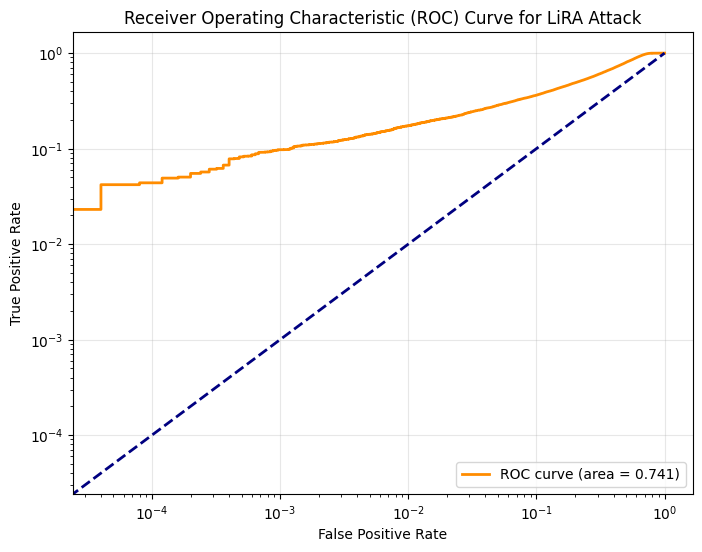

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the ground truth (target_trained_on) and scores (lira_score)
y_true = results["target_trained_on"]
y_scores = results["lira_score"]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for LiRA Attack")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.show()


In [6]:
csv_path = 'data/final_model_metrics_wrn40-4_CIFAR10.csv'
df = pd.read_csv(csv_path, index_col=0)
df

,loss,confidence,param_grad_norm,param_grad_var,input_grad_norm,input_grad_var,shap_norm,shap_var,lira_score,target_trained_on
0,0.000265,17.867111,0.039496,1.743082e-10,0.001912,1.190018e-09,1.178954,0.000442,2.723999e+00,False
1,0.000010,24.168812,0.001022,1.166830e-13,0.000022,1.532392e-13,1.028888,0.000326,9.234125e-01,True
2,0.000048,20.859344,0.006802,5.168312e-12,0.000431,6.056333e-11,1.466710,0.000685,2.682482e+00,True
3,0.000107,18.807659,0.018849,3.970210e-11,0.001124,4.112679e-10,1.041378,0.000342,1.186931e+00,False
4,0.000521,16.584314,0.049300,2.715854e-10,0.001400,6.378866e-10,0.941215,0.000279,1.441289e+00,True
...,...,...,...,...,...,...,...,...,...,...
49995,8.075362,9.300808,345.555176,1.334289e-02,34.359676,3.844298e-01,0.730423,0.000174,6.083869e-27,False
49996,1.350150,2.091790,434.993713,2.114353e-02,26.689789,2.319576e-01,1.382660,0.000619,1.585559e-13,False
49997,2.699254,5.146400,530.899719,3.149316e-02,27.108112,2.392867e-01,1.059881,0.000364,1.361878e-15,False
49998,0.000219,18.166180,0.020246,4.576951e-11,0.000349,3.975067e-11,0.890150,0.000247,9.645474e-01,False


In [7]:
make_precision_recall_at_k_df_single_threshold(
    scores_df=df,
    ground_truth_df=df,
    fpr_threshold=0.001,
    k_frac=0.01,
)

{'spearman_loss': 0.0138814268835421,
 'spearman_confidence': 0.018740010653137858,
 'spearman_param_grad_norm': 0.07916467416046427,
 'spearman_param_grad_var': 0.0791843657161166,
 'spearman_input_grad_norm': 0.15121505350020126,
 'spearman_input_grad_var': 0.15121515086871937,
 'spearman_shap_norm': 0.16306395224005302,
 'spearman_shap_var': 0.16262176617442242,
 'spearman_lira_score': 1.0,
 'fpr': 0.00104,
 'tpr': 0.08644,
 'positives': 2161,
 'precision_random_guess': 0.08644,
 'recall_random_guess': 0.01,
 'overlap_loss_desc': 28,
 'precision_loss_desc': 0.112,
 'recall_loss_desc': 0.012956964368347987,
 'overlap_loss_asc': 39,
 'precision_loss_asc': 0.156,
 'recall_loss_asc': 0.018047200370198982,
 'overlap_confidence_desc': 31,
 'precision_confidence_desc': 0.124,
 'recall_confidence_desc': 0.014345210550670985,
 'overlap_confidence_asc': 25,
 'precision_confidence_asc': 0.1,
 'recall_confidence_asc': 0.01156871818602499,
 'overlap_param_grad_norm_desc': 30,
 'precision_param_g